In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def load_losses(filename):
    """Load training and validation losses from losses.txt format"""
    try:
        filepath = f'hyperparameter_results/losses/{filename}'
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        # Parse training losses (first row)
        train_losses = np.array([float(x) for x in lines[0].strip().split()])
        # Parse validation losses (second row)  
        val_losses = np.array([float(x) for x in lines[1].strip().split()])
        
        return train_losses, val_losses
    except FileNotFoundError:
        print(f"File {filepath} not found")
        return None, None

In [12]:
experiments = {
    'week1': [
        ('losses_original_lr1e3_bs256.txt', 'Original (LR=1e-3, BS=256)', 'blue'),
        ('losses_lr1e4.txt', 'Lower LR (1e-4)', 'red'),
        ('losses_lr1e2.txt', 'Higher LR (1e-2)', 'green'),
        ('losses_bs128.txt', 'Smaller BS (128)', 'orange')
    ],
    
    'batch_size': [
        ('losses_batch32.txt', 'Batch Size 32 | 250 epochs', 'red'),
        ('losses_bs128.txt', 'Batch Size 128 | 100 epochs', 'purple'),
        ('losses_batch256.txt', 'Batch Size 256 | 250 epochs', 'blue'),
        ('losses_batch1000.txt', 'Batch Size 1000 | 250 epochs', 'green'),
        ('losses_batch1000_500epochs.txt', 'Batch Size 1000 | 500 epochs', 'darkgreen')
    ],
    
    'weight_decay': [
        ('losses_wd_0.txt', 'Weight Decay 0', 'red'),
        ('losses_wd_1e1.txt', 'Weight Decay 1e-1', 'blue'),
        ('losses_wd_1e3.txt', 'Weight Decay 1e-3', 'green'),
        ('losses_wd_1e5.txt', 'Weight Decay 1e-5', 'purple')
    ],
    
    'learning_rate': [
        ('losses_lr1e2.txt', 'Learning Rate 1e2', 'red'),
        ('losses_original_lr1e3_bs256.txt', 'Learning Rate 1e3', 'purple'),
        ('losses_lr1e4.txt', 'Learning Rate 1e4', 'blue'),
        ('losses_lr5e4.txt', 'Learning Rate 5e4', 'green')
    ],
    
    'extended_epochs': [
        ('losses_extended_500.txt', '500 epochs', 'red'),
        ('losses_extended_600.txt', '600 epochs', 'orange'),
        ('losses_extended_700.txt', '700 epochs', 'green'),
        ('losses_extended_800.txt', '800 epochs', 'blue')
    ],
    
    'accuracy': [
        ('losses_original_lr1e3_bs256.txt', 'Low Accuracy (baseline)', 'blue'),
        ('losses_high_accuracy.txt', 'High Accuracy', 'red'),
        ('losses_high_accuracy_400ep.txt', 'High Accuracy (400ep)', 'darkred'),
        ('losses_high_accuracy_bs32.txt', 'High Accuracy (BS=32)', 'orange')
    ],
    
    'combined': [
        ('losses_bs32_wd0.txt', 'BS=32, WD=0', 'red'),
        ('losses_bs32_wd1e3.txt', 'BS=32, WD=1e-3', 'blue'),
        ('losses_bs1000_wd1e3.txt', 'BS=1000, WD=1e-3', 'green'),
        ('losses_bs1000_wd1e5.txt', 'BS=1000, WD=1e-5', 'purple')
    ],
    
    'best': [
        ('losses_best_combo1.txt', 'Best Combo 1 (BS=256, WD=1e-5)', 'blue'),
        ('losses_best_combo2.txt', 'Best Combo 2 (BS=32, WD=0)', 'red'),
        ('losses_original_lr1e3_bs256.txt', 'Baseline', 'gray')
    ],

    'squeeze': [
        ('losses_squeeze_2.txt', 'Squeeze factor = 2', 'blue'),
        ('losses_squeeze_4.txt', 'Squeeze factor = 4', 'green'),
        ('losses_squeeze_8.txt', 'Squeeze factor = 8', 'red'),
        ('losses_squeeze_16.txt', 'Squeeze factor = 16', 'orange'),
        ('losses_squeeze_32.txt', 'Squeeze factor = 32', 'purple')
        # ('losses_temp8.txt', 'Squeeze factor = 8', 'red'),

    ],
    
    'squeeze_comparison': [
        ('losses_original_lr1e3_bs256.txt', 'Baseline (no squeeze)', 'gray'),
        ('losses_squeeze_8.txt', 'Squeeze factor = 8', 'red'),
        ('losses_best_combo1.txt', 'Best combo (no squeeze)', 'blue')
    ]
}

# Load experiment for plotting

In [13]:
# Choose which experiment group to load
experiment_group = 'squeeze'

# Load data
loss_data = {}
for filename, label, color in experiments[experiment_group]:
    train_losses, val_losses = load_losses(filename)
    if train_losses is not None:
        loss_data[label] = {
            'train': train_losses, 
            'val': val_losses,
            'color': color
        }
        print(f"Loaded {label}: {len(train_losses)} epochs")
    else:
        print(f"Could not load {label}")

Loaded Squeeze factor = 2: 500 epochs
Loaded Squeeze factor = 4: 500 epochs
Loaded Squeeze factor = 8: 500 epochs
Loaded Squeeze factor = 16: 500 epochs
Loaded Squeeze factor = 32: 500 epochs


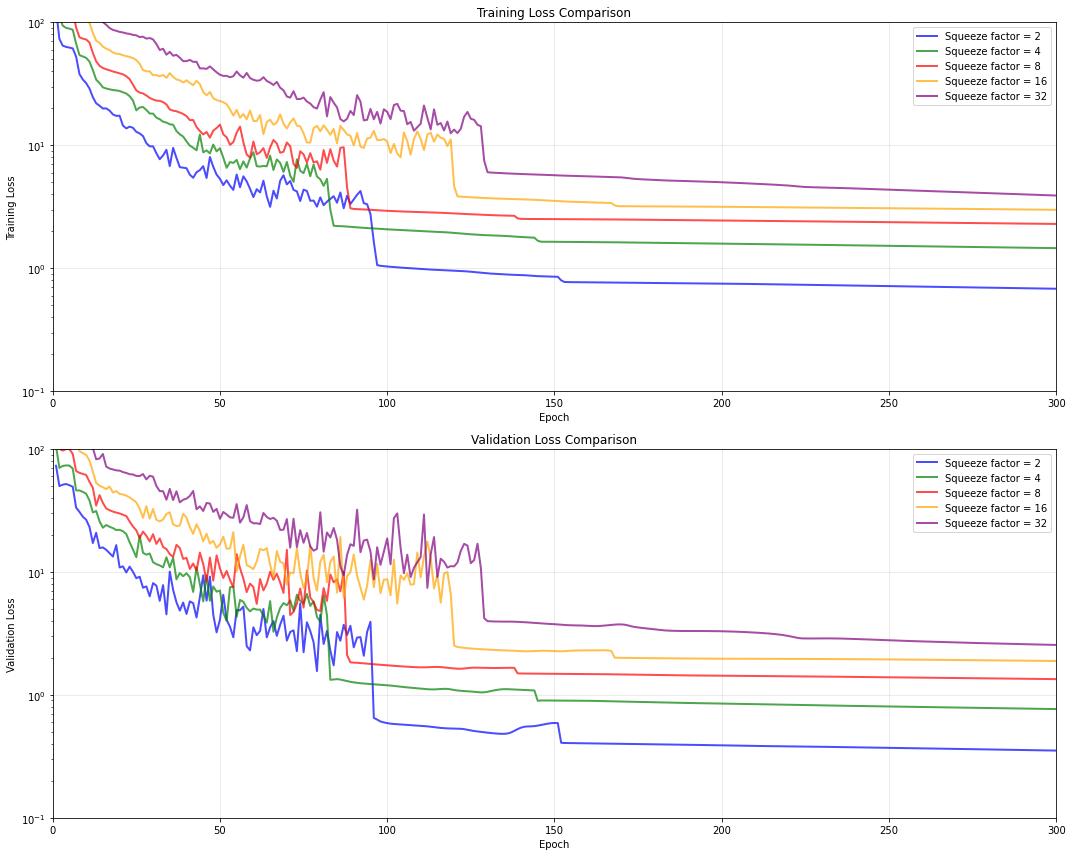

In [14]:
# Create comparison plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot all experiments
for label, data in loss_data.items():
    epochs = range(1, len(data['train']) + 1)
    
    ax1.plot(epochs, data['train'], color=data['color'], label=label, linewidth=2, alpha=0.7)
    ax2.plot(epochs, data['val'], color=data['color'], label=label, linewidth=2, alpha=0.7)

# Format training loss plot
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')
ax1.set_title('Training Loss Comparison')
ax1.set_yscale('log')
ax1.set_xlim(0,300)
ax1.set_ylim(1e-1, 100)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Format validation loss plot
ax2.set_xlabel('Epoch') 
ax2.set_ylabel('Validation Loss')
ax2.set_title('Validation Loss Comparison')
ax2.set_yscale('log')
ax2.set_xlim(0, 300)
ax2.set_ylim(1e-1, 100)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Compare learning rate drops

In [27]:
import pandas as pd

results = []
for label, data in loss_data.items():
    results.append({
        'Experiment': label,
        'Final Train Loss': f"{data['train'][-1]:.4f}",
        'Final Val Loss': f"{data['val'][-1]:.4f}",
        'Epochs': len(data['train'])
    })

df = pd.DataFrame(results)
print(df.to_string(index=False))

       Experiment Final Train Loss Final Val Loss  Epochs
   Weight Decay 0           0.3332         0.1825     300
Weight Decay 1e-1         104.5335        81.2452     300
Weight Decay 1e-3           0.5440         0.2762     300
Weight Decay 1e-5           0.6114         0.3225     300


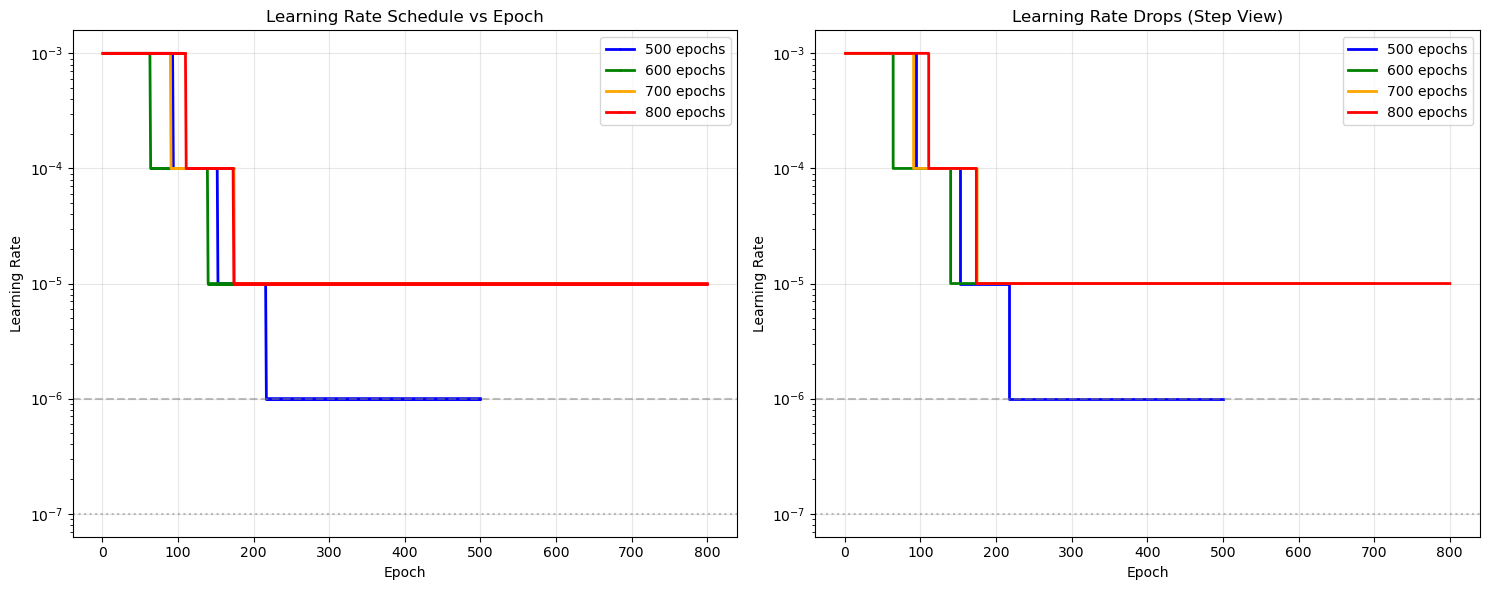

Learning Rate Analysis:
--------------------------------------------------

500 epochs:
  Started at: 1e-03
  Ended at: 1e-06
  Number of LR drops: 3
    Drop 1: Epoch 94, 1e-03 → 1e-04 (10.0x reduction)
    Drop 2: Epoch 153, 1e-04 → 1e-05 (10.0x reduction)
    Drop 3: Epoch 217, 1e-05 → 1e-06 (10.0x reduction)
  Reached 1e-6: ✓
  Reached 1e-7: ✗

600 epochs:
  Started at: 1e-03
  Ended at: 1e-05
  Number of LR drops: 2
    Drop 1: Epoch 64, 1e-03 → 1e-04 (10.0x reduction)
    Drop 2: Epoch 140, 1e-04 → 1e-05 (10.0x reduction)
  Reached 1e-6: ✗
  Reached 1e-7: ✗

700 epochs:
  Started at: 1e-03
  Ended at: 1e-05
  Number of LR drops: 2
    Drop 1: Epoch 91, 1e-03 → 1e-04 (10.0x reduction)
    Drop 2: Epoch 175, 1e-04 → 1e-05 (10.0x reduction)
  Reached 1e-6: ✗
  Reached 1e-7: ✗

800 epochs:
  Started at: 1e-03
  Ended at: 1e-05
  Number of LR drops: 2
    Drop 1: Epoch 111, 1e-03 → 1e-04 (10.0x reduction)
    Drop 2: Epoch 174, 1e-04 → 1e-05 (10.0x reduction)
  Reached 1e-6: ✗
  Reach

In [18]:
import re

def parse_learning_rates_from_log(log_file_path='overnight.log'):
    """
    Parse learning rates and epochs from the overnight log file.
    Returns a dictionary of experiments with their LR vs epoch data.
    """
    
    experiments = {}
    current_experiment = None
    
    with open(log_file_path, 'r') as f:
        lines = f.readlines()
    
    # Track which experiment we're currently parsing
    experiment_patterns = {
        'extended_500': 'Running.*500 epochs',
        'extended_600': 'Running.*600 epochs', 
        'extended_700': 'Running.*700 epochs',
        'extended_800': 'Running.*800 epochs'
    }
    
    for line in lines:
        # Check if we're starting a new experiment
        for exp_name, pattern in experiment_patterns.items():
            if re.search(pattern, line, re.IGNORECASE):
                current_experiment = exp_name
                experiments[exp_name] = {'epochs': [], 'learning_rates': []}
                break
        
        # Parse epoch lines: look for pattern like "Epoch 123/500 | ... | lr=1.00e-05 |"
        if current_experiment and 'Epoch' in line and 'lr=' in line:
            # Extract epoch number and learning rate
            epoch_match = re.search(r'Epoch\s+(\d+)/(\d+)', line)
            lr_match = re.search(r'lr=([0-9]+\.?[0-9]*e?[+-]?[0-9]*)', line)
            
            if epoch_match and lr_match:
                epoch = int(epoch_match.group(1))
                total_epochs = int(epoch_match.group(2))
                lr = float(lr_match.group(1))
                
                # Verify this matches the expected experiment
                expected_epochs = int(current_experiment.split('_')[1])
                if total_epochs == expected_epochs:
                    experiments[current_experiment]['epochs'].append(epoch)
                    experiments[current_experiment]['learning_rates'].append(lr)
    
    # Convert to numpy arrays
    for exp_name in experiments:
        experiments[exp_name]['epochs'] = np.array(experiments[exp_name]['epochs'])
        experiments[exp_name]['learning_rates'] = np.array(experiments[exp_name]['learning_rates'])
    
    return experiments

def plot_learning_rate_schedules(experiments):
    """
    Plot learning rate vs epoch for extended training experiments
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    colors = {'extended_500': 'blue', 'extended_600': 'green', 
              'extended_700': 'orange', 'extended_800': 'red'}
    
    for exp_name, data in experiments.items():
        if len(data['epochs']) == 0:
            print(f"No data found for {exp_name}")
            continue
            
        label = f"{exp_name.replace('extended_', '')} epochs"
        color = colors.get(exp_name, 'black')
        
        # Plot 1: Learning rate schedule
        ax1.plot(data['epochs'], data['learning_rates'], 
                color=color, label=label, linewidth=2, marker='o', markersize=1)
    
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Learning Rate')
    ax1.set_title('Learning Rate Schedule vs Epoch')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Learning rate drops (step function view)
    for exp_name, data in experiments.items():
        if len(data['epochs']) == 0:
            continue
            
        label = f"{exp_name.replace('extended_', '')} epochs"
        color = colors.get(exp_name, 'black')
        
        # Create step plot to show LR drops clearly
        ax2.step(data['epochs'], data['learning_rates'], 
                color=color, label=label, linewidth=2, where='post')
    
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Learning Rate') 
    ax2.set_title('Learning Rate Drops (Step View)')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add horizontal lines for target learning rates
    for ax in [ax1, ax2]:
        ax.axhline(y=1e-6, color='gray', linestyle='--', alpha=0.5, label='Target: 1e-6')
        ax.axhline(y=1e-7, color='gray', linestyle=':', alpha=0.5, label='Target: 1e-7')
    
    plt.tight_layout()
    plt.savefig('learning_rate_schedules.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def analyze_lr_progression(experiments):
    """
    Print analysis of learning rate progression
    """
    print("Learning Rate Analysis:")
    print("-" * 50)
    
    for exp_name, data in experiments.items():
        if len(data['epochs']) == 0:
            continue
            
        epochs = data['epochs']
        lrs = data['learning_rates']
        
        # Find LR drops
        lr_drops = []
        for i in range(1, len(lrs)):
            if lrs[i] < lrs[i-1]:
                lr_drops.append((epochs[i], lrs[i-1], lrs[i]))
        
        print(f"\n{exp_name.replace('extended_', '')} epochs:")
        print(f"  Started at: {lrs[0]:.0e}")
        print(f"  Ended at: {lrs[-1]:.0e}")
        print(f"  Number of LR drops: {len(lr_drops)}")
        
        for i, (epoch, old_lr, new_lr) in enumerate(lr_drops):
            reduction_factor = old_lr / new_lr
            print(f"    Drop {i+1}: Epoch {epoch}, {old_lr:.0e} → {new_lr:.0e} ({reduction_factor:.1f}x reduction)")
        
        # Check if reached targets
        min_lr = min(lrs)
        reached_1e6 = min_lr <= 1e-6
        reached_1e7 = min_lr <= 1e-7
        
        print(f"  Reached 1e-6: {'✓' if reached_1e6 else '✗'}")
        print(f"  Reached 1e-7: {'✓' if reached_1e7 else '✗'}")

# Usage in your notebook:
if __name__ == "__main__":
    # Parse the log file
    experiments = parse_learning_rates_from_log('overnight.log')
    
    # Create plots
    plot_learning_rate_schedules(experiments)
    
    # Print analysis
    analyze_lr_progression(experiments)